# Coleta de dados
Este notebook serve para buscar as bases de dados da covid no paraná

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

#built-in 
import datetime

A função abaixo faz a importação dos dados do site do governo do paraná em formato CSV 

In [2]:
def converte_variaveis_em_datas(dataframe):
    for variavel in dataframe.columns:
        if 'DATA' in variavel:
            try:
                dataframe[variavel] = pd.to_datetime(dataframe[variavel], format='%d/%m/%Y')
            
            except:
                print(f'Variável "{variavel}" contém um erro e conversão/formatação')
                pass
        else:
            pass 
    return dataframe


def tira_variaveis_IBGE(dataframe):
    dataframe = dataframe.drop(['IBGE_RES_PR','IBGE_ATEND_PR'], axis='columns')
    return dataframe


def cria_variavel_caso_confirmado_no_dia(dataframe):
    dataframe['CASO_CONFIRMADO_NO_DIA'] = 1
    return dataframe


def replace_nas_variaveis_obito_status(dataframe):

    dataframe['OBITO'] = dataframe['OBITO'].replace('SIM','Sim')
    dataframe['OBITO'] = dataframe['OBITO'].replace('Não','Nao')

    dataframe['OBITO'] = dataframe['OBITO'].replace('Sim',1)
    dataframe['OBITO'] = dataframe['OBITO'].replace('Nao',0)

    dataframe['STATUS'] = dataframe['STATUS'].replace('Recuperado','recuperado')
    dataframe['STATUS'] = dataframe['STATUS'].replace('recuperado', 1)
    dataframe['STATUS'] = dataframe['STATUS'].replace('nan', 0)

    return dataframe
    

def pre_processamento(dataframe):
    dataframe = converte_variaveis_em_datas(dataframe)
    dataframe = tira_variaveis_IBGE(dataframe)
    dataframe = cria_variavel_caso_confirmado_no_dia(dataframe)
    dataframe = replace_nas_variaveis_obito_status(dataframe)
    dataframe = dataframe.set_index('DATA_CONFIRMACAO_DIVULGACAO')
    dataframe = dataframe.sort_index()
    return dataframe

def baixa_base_de_dados_casos_gerais(ano,mes,dia):
    """
    Esta função baixa a base de dados disponível no ano, mes e dia.
    retorna um dataframe do pandas com os dados disponpiveis.
    """
    data = datetime.date(ano, mes, dia)
    ano = str(data.year)

    if mes != 10 and mes != 11 and mes != 12:
        mes = '0'+str(data.month)
    else:
        mes = str(data.month)

    if dia in [1,2,3,4,6,7,8,9]:
        dia = '0'+str(data.day)

    ano_mes = ano+'-'+mes

    if ano == '2020':
        arquivo = f'INFORME_EPIDEMIOLOGICO_{dia}_{mes}_GERAL.csv'
    elif ano == '2021':
        arquivo = f'informe_epidemiologico_{dia}_{mes}_{ano}_geral.csv'
    # Podem acontecer as seguintes variações no site do estado:
    # informe_epidemiologico_{dia}_{mes}_{ano}_geral.csv
    # informe_epidemiologico_{dia}_{mes}_geral.csv
    # INFORME_EPIDEMIOLOGICO_{dia}_{mes}_GERAL.csv



    dominio = 'https://www.saude.pr.gov.br'
    caminho = f'/sites/default/arquivos_restritos/files/documento/{ano_mes}/'
    try:

        url = dominio+caminho+arquivo
        base_de_dados = pd.read_csv(url, sep=';')
        base_de_dados = pre_processamento(base_de_dados)
        
    
    except:
        raise Exception('Não Tem dados disponíveis neste dia.')

    return base_de_dados



In [3]:
informe_covid = baixa_base_de_dados_casos_gerais(2021, 3, 6)

In [4]:
informe_covid

,IBGE_RES_PR,IBGE_ATEND_PR,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,OBITO,DATA_OBITO,DATA_OBITO_DIVULGACAO,STATUS,DATA_RECUPERADO_DIVULGACAO,FONTE_DADO_RECUPERADO
0,4126256,4126256,M,82,SARANDI,SARANDI,"COVID-19, Biologia Molecular",27/02/2021,01/03/2021,21/02/2021,NaN,NaN,NaN,NaN,NaN,NaN
1,4104808,4104808,M,19,CASCAVEL,CASCAVEL,"COVID-19, Biologia Molecular",26/02/2021,01/03/2021,19/02/2021,NaN,NaN,NaN,NaN,NaN,NaN
2,4106902,4106902,F,45,CURITIBA,CURITIBA,"COVID-19, Biologia Molecular",28/02/2021,01/03/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4102406,4102406,M,41,BANDEIRANTES,BANDEIRANTES,"COVID-19, Biologia Molecular",26/02/2021,01/03/2021,19/02/2021,NaN,NaN,NaN,NaN,NaN,NaN
4,4120309,4120309,M,15,PORTO VITORIA,PORTO VITORIA,"COVID-19, Biologia Molecular",28/02/2021,01/03/2021,22/02/2021,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680772,4104204,4104204,M,28,CAMPO LARGO,CAMPO LARGO,"COVID-19, Biologia Molecular",01/03/2021,05/03/2021,24/02/2021,NaN,NaN,NaN,NaN,NaN,NaN
680773,4108908,4108908,M,10,GUAIRACA,GUAIRACA,"COVID-19, Biologia Molecular",03/03/2021,05/03/2021,25/02/2021,NaN,NaN,NaN,NaN,NaN,NaN
680774,4117602,4117602,M,64,PALMAS,PALMAS,Teste Rápido Antígeno (Imunocromatografia),03/03/2021,05/03/2021,01/03/2021,NaN,NaN,NaN,NaN,NaN,NaN
680775,4127700,4127700,M,66,TOLEDO,TOLEDO,Teste Rápido Antígeno (Imunocromatografia),04/03/2021,05/03/2021,28/02/2021,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
informe_covid = pre_processamento(informe_covid)

Variável "DATA_INICIO_SINTOMAS" contém um erro e conversão/formatação


In [6]:
casos_por_dia = informe_covid.groupby('DATA_CONFIRMACAO_DIVULGACAO')['CASO_CONFIRMADO_NO_DIA'].sum()

In [7]:
casos_por_dia

DATA_CONFIRMACAO_DIVULGACAO
2020-03-12       6
2020-03-17       4
2020-03-18       4
2020-03-19       8
2020-03-20      13
              ... 
2021-03-02    6174
2021-03-03    4706
2021-03-04    5405
2021-03-05    5670
2021-03-06    8598
Name: CASO_CONFIRMADO_NO_DIA, Length: 356, dtype: int64

In [8]:
def evolucao_dos_casos():
    pass 

In [9]:
def agrupa_pela_cidade(cidade,dataframe):
    dataframe.query(f'MUN_ATENDIMENTO == "{cidade.upper()}"')
    pass

In [10]:

dados_ponta_grossa = informe_covid.query('MUN_ATENDIMENTO == "PONTA GROSSA"')

In [11]:

caso_por_dia_PG = dados_ponta_grossa.groupby('DATA_CONFIRMACAO_DIVULGACAO')['CASO_CONFIRMADO_NO_DIA'].sum().to_frame()

<AxesSubplot:xlabel='DATA_CONFIRMACAO_DIVULGACAO'>

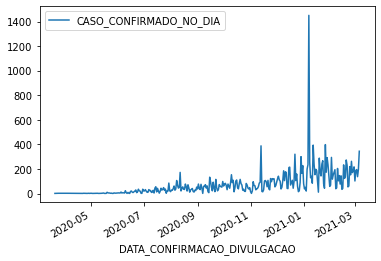

In [12]:
caso_por_dia_PG.plot()

In [13]:
dados_ponta_grossa.STATUS.unique()

array([ 1., nan])

In [14]:
informe_covid

,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_INICIO_SINTOMAS,OBITO,DATA_OBITO,DATA_OBITO_DIVULGACAO,STATUS,DATA_RECUPERADO_DIVULGACAO,FONTE_DADO_RECUPERADO,CASO_CONFIRMADO_NO_DIA
DATA_CONFIRMACAO_DIVULGACAO,,,,,,,,,,,,,,
2020-03-12,M,15,CURITIBA,CURITIBA,LACEN,2020-03-12,08/03/2020,0.0,NaT,NaT,1.0,NaT,NaN,1
2020-03-12,M,43,CURITIBA,CURITIBA,LACEN,2020-03-12,07/03/2020,0.0,NaT,NaT,1.0,NaT,NaN,1
2020-03-12,F,47,CIANORTE,CIANORTE,LACEN,2020-03-12,NaN,0.0,NaT,NaT,1.0,NaT,Notificações,1
2020-03-12,F,26,CURITIBA,CURITIBA,Genoprimer,2020-03-16,11/03/2020,0.0,NaT,NaT,1.0,NaT,NaN,1
2020-03-12,F,26,CURITIBA,CURITIBA,Genoprimer,2020-03-18,15/03/2020,0.0,NaT,NaT,1.0,NaT,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-06,F,33,MARINGA,MARINGA,Teste Rápido Antígeno (Imunocromatografia),2021-03-04,01/03/2021,NaN,NaT,NaT,NaN,NaT,NaN,1
2021-03-06,F,20,ROLANDIA,ROLANDIA,"COVID-19, Biologia Molecular",2021-02-27,18/02/2021,0.0,NaT,NaT,1.0,2021-03-06,NOTIFICA COVID,1
2021-03-06,F,35,ALMIRANTE TAMANDARE,ALMIRANTE TAMANDARE,"COVID-19, Biologia Molecular",2021-03-05,27/02/2021,NaN,NaT,NaT,NaN,NaT,NaN,1
